In [3]:
import pandas as pd
import numpy as np
Data_path = "C:\\Users\\patiphiri\\Desktop\\Oasis datascience\\Task_1_irisClass\\Iris\\Iris.csv"

In [5]:
Iris_df = pd.read_csv(Data_path)
print(Iris_df.describe())
Iris_df.head()


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
Iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
cols_with_missing = [col for col in Iris_df.columns
                     if Iris_df[col].isnull().any()]

if cols_with_missing:
    print(cols_with_missing)
else:
    print("No columns with msiing values,therefore no need for imputation")

No columns with msiing values,therefore no need for imputation


In [16]:
from sklearn.preprocessing import LabelEncoder
my_Encoder = LabelEncoder()
y = my_Encoder.fit_transform(Iris_df['Species'])

In [30]:
from sklearn.model_selection import train_test_split
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = Iris_df[features]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify= y,test_size = 0.3,random_state =42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
DT_classifier = DecisionTreeClassifier(random_state = 42)
DT_classifier.fit(X_train,y_train)
predictions_DT = DT_classifier.predict(X_test)
DT_accuracy = accuracy_score(y_test,predictions_DT)
classification_Report = classification_report(y_test,predictions_DT)

print(f'Accuracy is:\t{DT_accuracy}')
print(f'Classificatio Report:\n{classification_Report}')


Accuracy is:	0.9333333333333333
Classificatio Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [32]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
RF_classifier.fit(X_train,y_train)
predictions_RF = RF_classifier.predict(X_test)
RF_accuracy = accuracy_score(y_test,predictions_RF)
classification_Report = classification_report(y_test,predictions_RF)

print(f'Accuracy is:\t{RF_accuracy}')
print(f'Classificatio Report:\n{classification_Report}')


Accuracy is:	0.8888888888888888
Classificatio Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
KNN_classifier = KNeighborsClassifier(n_neighbors = 2)
KNN_classifier.fit(X_train,y_train)
predictions_KNN = KNN_classifier.predict(X_test)
KNN_accuracy = accuracy_score(y_test,predictions_KNN)
#classification_Report = classification_report(y_test,predictions_KNN)

# Inverse transform the encoded labels back to their original names
predicted_labelsKNN = my_Encoder.inverse_transform(predictions_KNN)
actual_labels = my_Encoder.inverse_transform(y_test)

classification_Report = classification_report(actual_labels, predicted_labelsKNN, digits=4)

print(f'Accuracy is:\t{KNN_accuracy}')
print(f'Classificatio Report:\n{classification_Report}')

Accuracy is:	0.9111111111111111
Classificatio Report:
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        15
Iris-versicolor     0.7895    1.0000    0.8824        15
 Iris-virginica     1.0000    0.7333    0.8462        15

       accuracy                         0.9111        45
      macro avg     0.9298    0.9111    0.9095        45
   weighted avg     0.9298    0.9111    0.9095        45



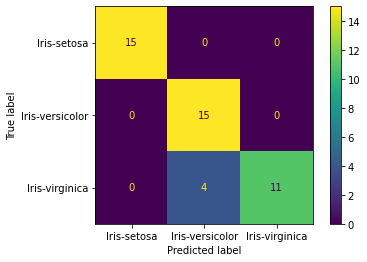

In [34]:
# Compute and display the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labelsKNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(actual_labels))
disp.plot(cmap='viridis')